# Manipulación de tweets

Cargando datos

In [1]:
import pandas as pd
import warnings
import re
from unicodedata import normalize

from sklearn.feature_extraction.text import TfidfVectorizer
import stop_words

import spacy

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('marioPelicula.xlsx')
df

,tweets
0,RT @MissMechanikal: Eso no es un comercial...\...
1,RT @MissMechanikal: Eso no es un comercial...\...
2,RT @MissMechanikal: Eso no es un comercial...\...
3,RT @MissMechanikal: Eso no es un comercial...\...
4,RT @MissMechanikal: Eso no es un comercial...\...
...,...
395,#SuperMarioMovie no ve límites! https://t.co/U...
396,RT @FireBea91564049: No hace mucho hice este d...
397,Una de las peliculas que recuerdo con más cari...
398,Hace una semana que estoy cantando esto. #Supe...


Limpieza de cada uno de los tweets, uso de expresiones regulares

In [4]:
df.dropna()
df["cleanTweet"] = ""

for i in range(len(df["tweets"])):
  df["cleanTweet"][i] = str(df["tweets"][i])
  df["cleanTweet"][i] = re.sub('(f|ht)tp(s?)://(.*)[.][a-z]+[/][a-z]+',' ',df["cleanTweet"][i])
  df["cleanTweet"][i] = re.sub('[a-zA-Z0-9.?{}]+@\w+\.\w+.\w*','',df["cleanTweet"][i])
  df["cleanTweet"][i] = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD",df["cleanTweet"][i]), 0, re.I)
  df["cleanTweet"][i] = re.sub('[^a-zA-Z_á\éíóúà\èìòùäëïöü\s]','',df["cleanTweet"][i])
  df["cleanTweet"][i] = df["cleanTweet"][i].lower()

Lematización de los datos

In [5]:
nlp = spacy.load("es_core_news_sm")

def lemmatize_text(text):
    doc = nlp(text)
    lemma_list = [token.lemma_ for token in doc]
    return ' '.join(lemma_list)

df["tweet_lemmatized"] = df["cleanTweet"].apply(lemmatize_text)

df

,tweets,cleanTweet,tweet_lemmatized
0,RT @MissMechanikal: Eso no es un comercial...\...,rt missmechanikal eso no es un comercial\nsupe...,rt missmechanikal ese no ser uno comercial \n ...
1,RT @MissMechanikal: Eso no es un comercial...\...,rt missmechanikal eso no es un comercial\nsupe...,rt missmechanikal ese no ser uno comercial \n ...
2,RT @MissMechanikal: Eso no es un comercial...\...,rt missmechanikal eso no es un comercial\nsupe...,rt missmechanikal ese no ser uno comercial \n ...
3,RT @MissMechanikal: Eso no es un comercial...\...,rt missmechanikal eso no es un comercial\nsupe...,rt missmechanikal ese no ser uno comercial \n ...
4,RT @MissMechanikal: Eso no es un comercial...\...,rt missmechanikal eso no es un comercial\nsupe...,rt missmechanikal ese no ser uno comercial \n ...
...,...,...,...
395,#SuperMarioMovie no ve límites! https://t.co/U...,supermariomovie no ve limites httpstcouzhteazdz,supermariomovie no ver limit httpstcouzhteazdz
396,RT @FireBea91564049: No hace mucho hice este d...,rt firebea no hace mucho hice este dibujo de y...,rt firebea no hacer mucho hacer este dibujo de...
397,Una de las peliculas que recuerdo con más cari...,una de las peliculas que recuerdo con mas cari...,uno de el pelicula que recordar con mas carino...
398,Hace una semana que estoy cantando esto. #Supe...,hace una semana que estoy cantando esto superm...,hacer uno semana que estar cantar este superma...


Generar vectorización de los tweets en crudo, tweets limpios y tweets lematizados para ver la frecuencia de las palabras

In [6]:
wordsToExclude = stop_words.get_stop_words("es")

In [7]:
vectorizer = TfidfVectorizer(stop_words=wordsToExclude)
tweets = vectorizer.fit_transform(df["tweets"])

clean_tweets = vectorizer.transform(df["cleanTweet"])

tweet_lemmatized = vectorizer.transform(df["tweet_lemmatized"])

<Axes: title={'center': 'Most frequent words'}>

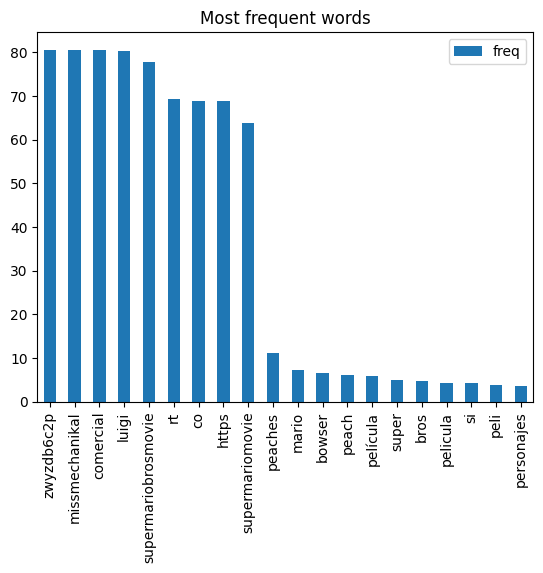

In [8]:
result1 = pd.DataFrame(data = tweets.sum(axis=0).T, index = vectorizer.get_feature_names_out(), columns=["freq"])
result2 = pd.DataFrame(data = clean_tweets.sum(axis=0).T, index = vectorizer.get_feature_names_out(), columns=["freq"])
result3 = pd.DataFrame(data = tweet_lemmatized.sum(axis=0).T, index = vectorizer.get_feature_names_out(), columns=["freq"])
orderedResult1 = result1.sort_values(by="freq",ascending=False)
orderedResult2 = result2.sort_values(by="freq",ascending=False)
orderedResult3 = result3.sort_values(by="freq",ascending=False)

orderedResult1[:20].plot(kind = "bar",title="Most frequent words")

<Axes: title={'center': 'Most frequent words'}>

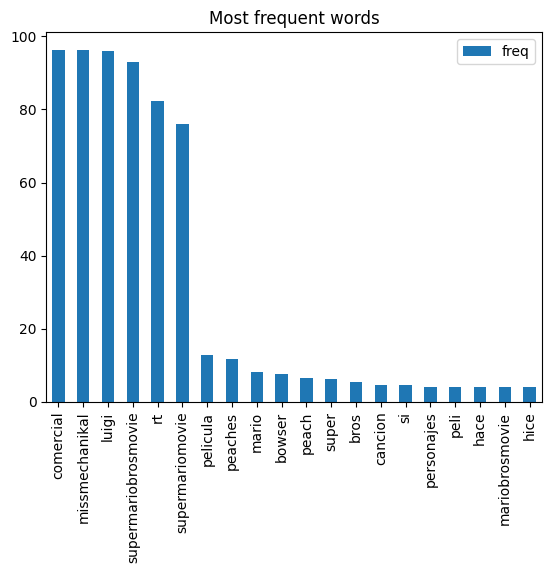

In [9]:
orderedResult2[:20].plot(kind = "bar",title="Most frequent words")

<Axes: title={'center': 'Most frequent words'}>

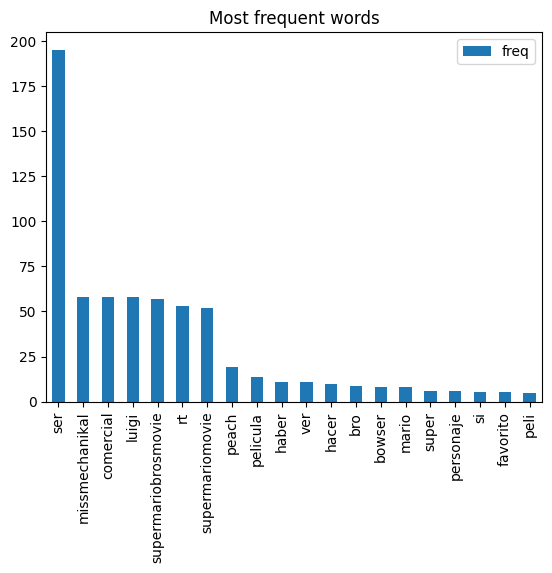

In [10]:
orderedResult3[:20].plot(kind = "bar",title="Most frequent words")

Ver la fracuencia de las palabras esta vez en una nube de palabras

[nltk_data] Downloading package stopwords to /home/mateo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


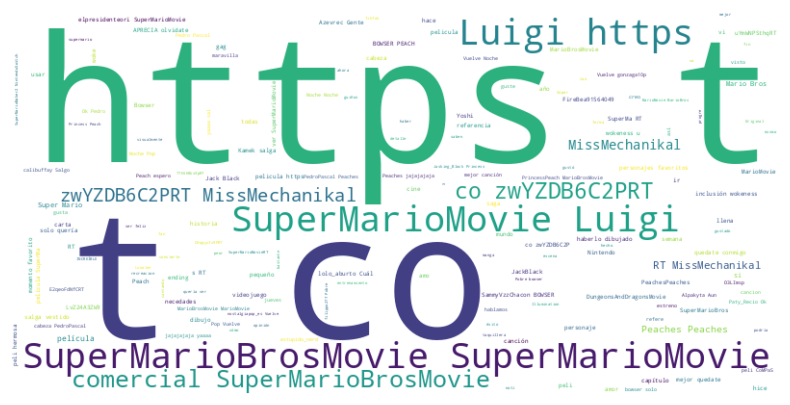

In [11]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download('stopwords')

texto = ''.join(df["tweets"])


stop_words = set(stopwords.words('spanish'))

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=800,
                      height=400).generate(texto)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

# Manipulación del libro

In [13]:
with open('J.K. Rowling - Harry Potter 3 - El Prisionero de Azkaban.txt', 'r', encoding='utf-8') as file:
    texto = file.read()


df = pd.DataFrame({'texto': [texto]})
df

,texto
0,J.K. Rowling\nHarry Potter y el prisionero de ...


Creación de nube de palabras esta vez utilizando spacy para una manipulación diferente en las stopwords.

Genero 3 nubes de palabras, una con los nombres encontrados en el libro, una con los lugares y la ultima sin incluir ninguno de los dos grupos; para esto no solo se tienen en cuenta las stopwords del español si no tambien listas generadas con la ayuda del modelo de spacy para obtener aquellas palabras que necesito.

# solo nombres

In [14]:
import spacy

#Cargar el modelo en español
nlp = spacy.load("es_core_news_sm")
texto = ''.join(df["texto"])
doc = nlp(texto)

In [25]:
#stop words español
español = list(stopwords.words('spanish'))

#Extraer nombres de personas 
nombres = {ent.text for ent in doc.ents if ent.label_ not in ['PER']}

#uno ambas listas
stop_words = list(nombres)
stop_words = stop_words + español

print(stop_words)

['Pasó', 'casa de Hagrid', 'Las aletas de la nariz', 'La snitch', '\x97Macnair', 'Genial', 'Pero no: su última esperanza', '\x97Sube', 'Un momento después apareció Malfoy', '\x97dijo Harry\x97. No pueden.', 'Las palabras de la profesora', 'Quién', 'Me temo', 'Después', 'No había ninguna puerta', 'Vainilla de viento.', 'Luego señaló la puerta de la enfermería', 'Weasley? \x97preguntó Malfoy', 'Las estruendosas carcajadas', 'Todos los pies', 'No le habían oído', 'Los dos años que', 'Iremos', 'Saltó', 'Malfoy?', 'Si hay alguien cerca', 'Dedicaremos', 'NO SÉ', 'PARTIDO!\nRavenclaw', 'Muy despacio', 'La primera clase de Adivinación', 'Trelawney anunció:\n\x97¡Harry Potter!\nEn la sala de la torre', 'Encantamientos?\n', 'La venganza', '¿Black', 'No era tan idiota', 'Veía', 'La luna', 'El frío penetró', '\x97Lupin suspiró', 'IMBÉCIL! \x97gritó de repente Snape', 'No sabremos', 'Veamos... ¿', 'Pero Malfoy', 'Intercity 125', 'Quiero', '¿Cómo', 'A Wendelin la Hechicera', 'Las apartó para decir: 

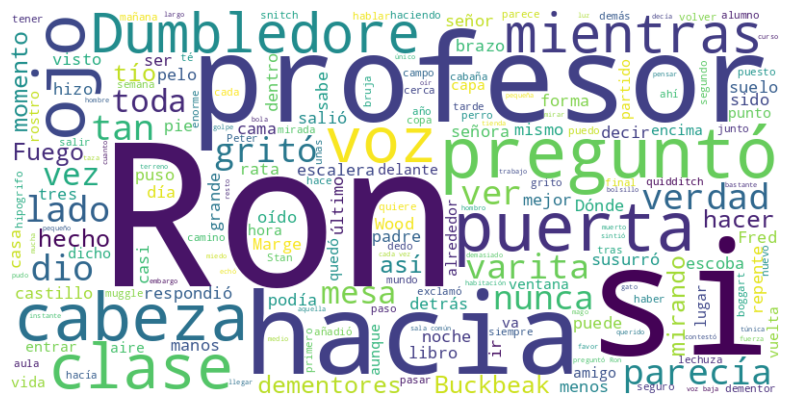

In [26]:
#nube de palabras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=800,
                      height=400).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()


# solo lugares

In [17]:
#nombres de lugares
lugares = {ent.text for ent in doc.ents if ent.label_ not in ['LOC']}

#unir ambas listas
stop_words = list(lugares)
stop_words = stop_words + español

print(stop_words)

['Dean \x97respondió', 'Las aletas de la nariz', '\x97gritó Seamus Finnigan', 'La snitch', 'Venid', '\x97Macnair', 'Rasgó', 'Genial', 'Pero no: su última esperanza', '\x97Sube', 'Un momento después apareció Malfoy', '\x97dijo Harry\x97. No pueden.', 'Las palabras de la profesora', 'Quién', 'Podía', 'Me temo', 'Después', 'No había ninguna puerta', 'Luego señaló la puerta de la enfermería', 'Weasley? \x97preguntó Malfoy', 'Las estruendosas carcajadas', 'Todos los pies', 'No le habían oído', 'Los dos años que', 'Malfoy?', 'Si hay alguien cerca', 'Dedicaremos', 'NO SÉ', 'PARTIDO!\nRavenclaw', 'Muy despacio', 'La primera clase de Adivinación', 'Trelawney anunció:\n\x97¡Harry Potter!\nEn la sala de la torre', 'Encantamientos?\n', 'La venganza', '¿Black', 'No era tan idiota', 'El frío penetró', '\x97Lupin suspiró', 'IMBÉCIL! \x97gritó de repente Snape', 'No sabremos', 'Veamos... ¿', 'Pero Malfoy', 'Intercity 125', 'Quiero', '¿Cómo', 'A Wendelin la Hechicera', 'Las apartó para decir: \n\x97¿Si

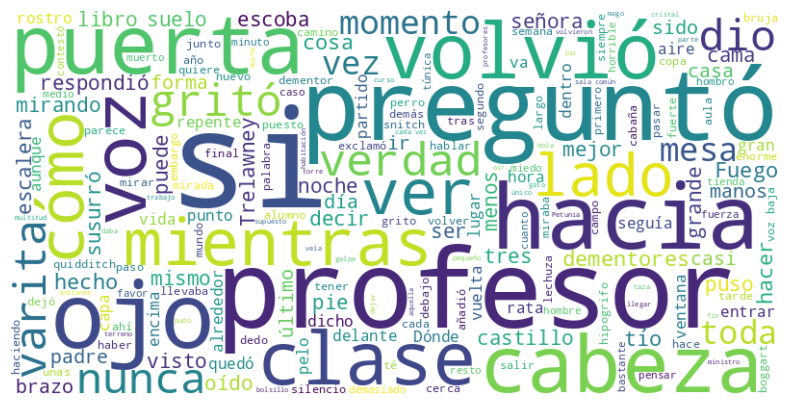

In [18]:
#nube de palabras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=800,
                      height=400).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


# no nombres no lugares

In [21]:
#nombres de personas y lugares
nombreslugares = {ent.text for ent in doc.ents if ent.label_ in ['PER, LOC']}

#unir ambas listas
stop_words = list(nombreslugares)
stop_words = stop_words + español

print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

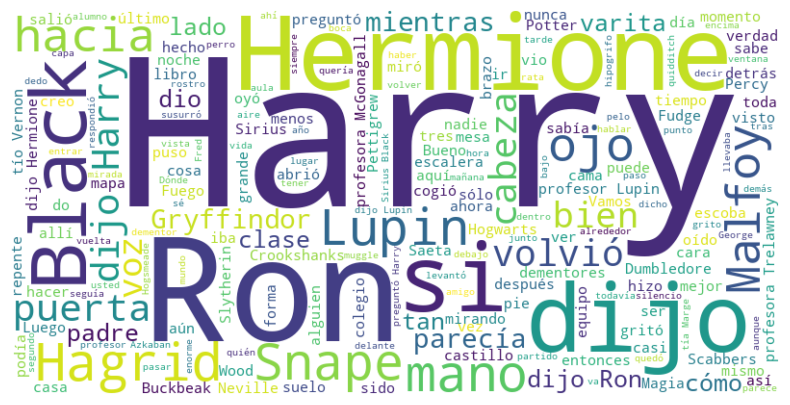

In [22]:
#nube de palabras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=800,
                      height=400).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()
